In [47]:
from tensorflow import keras
keras.__version__
import tensorflow as tf

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 4s 1us/step


In [9]:
print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


In [10]:
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [11]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

2022-01-13 20:28:28.291108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-13 20:28:28.291406: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [20]:
for layer in model.layers:
    print(layer.name)

flatten
dense
dense_1
dense_2


In [25]:
weights,biases=model.layers[1].get_weights()

In [27]:
print(weights.shape,biases.shape)

(784, 300) (300,)


In [31]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [32]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30


2022-01-13 20:53:24.454862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1714/1719 [============================>.] - ETA: 0s - loss: 0.7309 - accuracy: 0.7602

2022-01-13 20:53:36.086576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 6ms/step - loss: 0.7305 - accuracy: 0.7604 - val_loss: 0.5515 - val_accuracy: 0.8146
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4917 - accuracy: 0.8283 - val_loss: 0.4522 - val_accuracy: 0.8490
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4462 - accuracy: 0.8438 - val_loss: 0.4231 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4185 - accuracy: 0.8522 - val_loss: 0.3984 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3978 - accuracy: 0.8607 - val_loss: 0.3872 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3798 - accuracy: 0.8650 - val_loss: 0.4225 - val_accuracy: 0.8470
Epoch 7/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3678 - accuracy: 0.8702 - val_loss: 0.3744 - val_accuracy: 0.8656
E

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [36]:
history.history,history.epoch

({'loss': [0.7305045127868652,
   0.49166780710220337,
   0.44615232944488525,
   0.41846925020217896,
   0.3978159725666046,
   0.3798046410083771,
   0.3677518665790558,
   0.35448408126831055,
   0.34441033005714417,
   0.33500558137893677,
   0.3257652223110199,
   0.31844860315322876,
   0.3109545409679413,
   0.3040117919445038,
   0.29733189940452576,
   0.29101476073265076,
   0.2853759229183197,
   0.279546856880188,
   0.274511456489563,
   0.26881512999534607,
   0.26450708508491516,
   0.2599198520183563,
   0.256144642829895,
   0.2501894235610962,
   0.24628816545009613,
   0.24242697656154633,
   0.23874519765377045,
   0.23469321429729462,
   0.2307594269514084,
   0.22656381130218506],
  'accuracy': [0.7603636384010315,
   0.8283272385597229,
   0.8438363671302795,
   0.8521999716758728,
   0.8607090711593628,
   0.8649635910987854,
   0.870236337184906,
   0.8741636276245117,
   0.87701815366745,
   0.8805636167526245,
   0.8830727338790894,
   0.8860181570053101,
   

<AxesSubplot:>

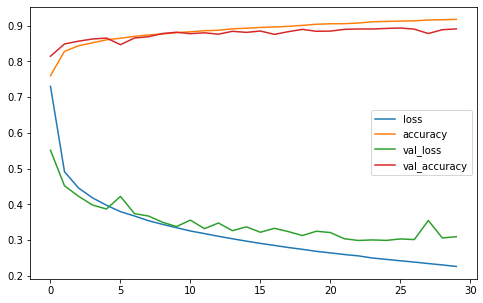

In [37]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))

In [38]:
model.evaluate(X_test,y_test)

 22/313 [=>............................] - ETA: 1s - loss: 69.3340 - accuracy: 0.8310

2022-01-13 21:38:47.509504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 82.6076 - accuracy: 0.8205


[82.6076431274414, 0.8205000162124634]

In [39]:
X_new = X_test[:3]

In [58]:
y_proba = model.predict(X_new)

In [59]:
y_pred = tf.math.argmax(y_proba,axis=1)

In [60]:
import numpy as np
np.array(class_names)

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U10')